In [1]:
"""
# Analyzing Poverty in Honduras

In this notebook, we will analyze the poverty levels in Honduras using multiple indicators such as economic growth, tourism, education spending, and more. We aim to develop a predictive model to estimate the "Share below $1 a day" based on these indicators.
"""

'\n# Analyzing Poverty in Honduras\n\nIn this notebook, we will analyze the poverty levels in Honduras using multiple indicators such as economic growth, tourism, education spending, and more. We aim to develop a predictive model to estimate the "Share below $1 a day" based on these indicators.\n'

In [2]:
import pandas as pd

# Load and merge datasets

datasets = {
    "poverty": r'C:\Users\JFB\Documents\Pythoncsv\Personal\populationinpoverty.csv',
    "economy": r'C:\Users\JFB\Documents\Pythoncsv\Personal\economicgrowth.csv',
    "tourism": r'C:\Users\JFB\Documents\Pythoncsv\Personal\tourismtrips.csv',
    "education": r'C:\Users\JFB\Documents\Pythoncsv\Personal\educationspending.csv',
    "homicides": r'C:\Users\JFB\Documents\Pythoncsv\Personal\homicides.csv',
    "electricity": r'C:\Users\JFB\Documents\Pythoncsv\Personal\electricityaccess.csv',
    "electricityaccess": r'C:\Users\JFB\Documents\Pythoncsv\Personal\accesstoelectricity.csv',
    "agricultural": r'C:\Users\JFB\Documents\Pythoncsv\Personal\agriculturalland.csv',
    "govspending": r'C:\Users\JFB\Documents\Pythoncsv\Personal\gdpgovexpenditure.csv',
    "healthspend": r'C:\Users\JFB\Documents\Pythoncsv\Personal\healthspending.csv',
    "internetuse": r'C:\Users\JFB\Documents\Pythoncsv\Personal\internetuse.csv',
    "undernourishment": r'C:\Users\JFB\Documents\Pythoncsv\Personal\prevalenceofundernourishment.csv',
    "renewables": r'C:\Users\JFB\Documents\Pythoncsv\Personal\renewableelectricity.csv',
    "socspending": r'C:\Users\JFB\Documents\Pythoncsv\Personal\socialspending.csv'
}

honduras_data = pd.read_csv(datasets["poverty"])
honduras_data = honduras_data[honduras_data['Entity'] == 'Honduras']

for key, csv_path in datasets.items():
    if key != "poverty":
        temp_data = pd.read_csv(csv_path)
        temp_data = temp_data[temp_data['Entity'] == 'Honduras']
        honduras_data = honduras_data.merge(temp_data, on=['Year', 'Entity'], how='outer')

honduras_data.head()

,Entity,Year,Share below $1 a day,Share below $2.15 a day,GDP per capita,tourists,education spending,homicides,urban access to electricity percentage,rural access to electricity percentage,access to electricity,Agricultural land hectares,Expense (% of GDP),health spending,Individuals using the Internet (% of population),Prevalence of undernourishment (% of population),Renewable electricity share,Social Expenditure GDP Percentage
0,Honduras,1989,16.559424,39.959561,3166.6462,NaN,NaN,NaN,NaN,NaN,NaN,3371000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Honduras,1990,18.560977,41.997452,3253.6936,NaN,NaN,495.53280,NaN,NaN,NaN,3320000.0,NaN,NaN,0.0,NaN,NaN,NaN
2,Honduras,1991,9.142681,30.774723,3317.5164,NaN,NaN,703.79320,88.700620,31.257088,54.781937,3342000.0,NaN,NaN,0.0,NaN,NaN,NaN
3,Honduras,1992,6.505092,26.968343,3328.1123,NaN,NaN,955.10614,89.851265,37.012500,58.913113,3355000.0,NaN,NaN,0.0,NaN,NaN,NaN
4,Honduras,1993,5.668213,21.429638,3499.3900,NaN,NaN,1252.52270,92.082520,38.717102,61.100155,3548000.0,NaN,NaN,0.0,NaN,NaN,NaN


C:\ProgramData\anaconda3\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


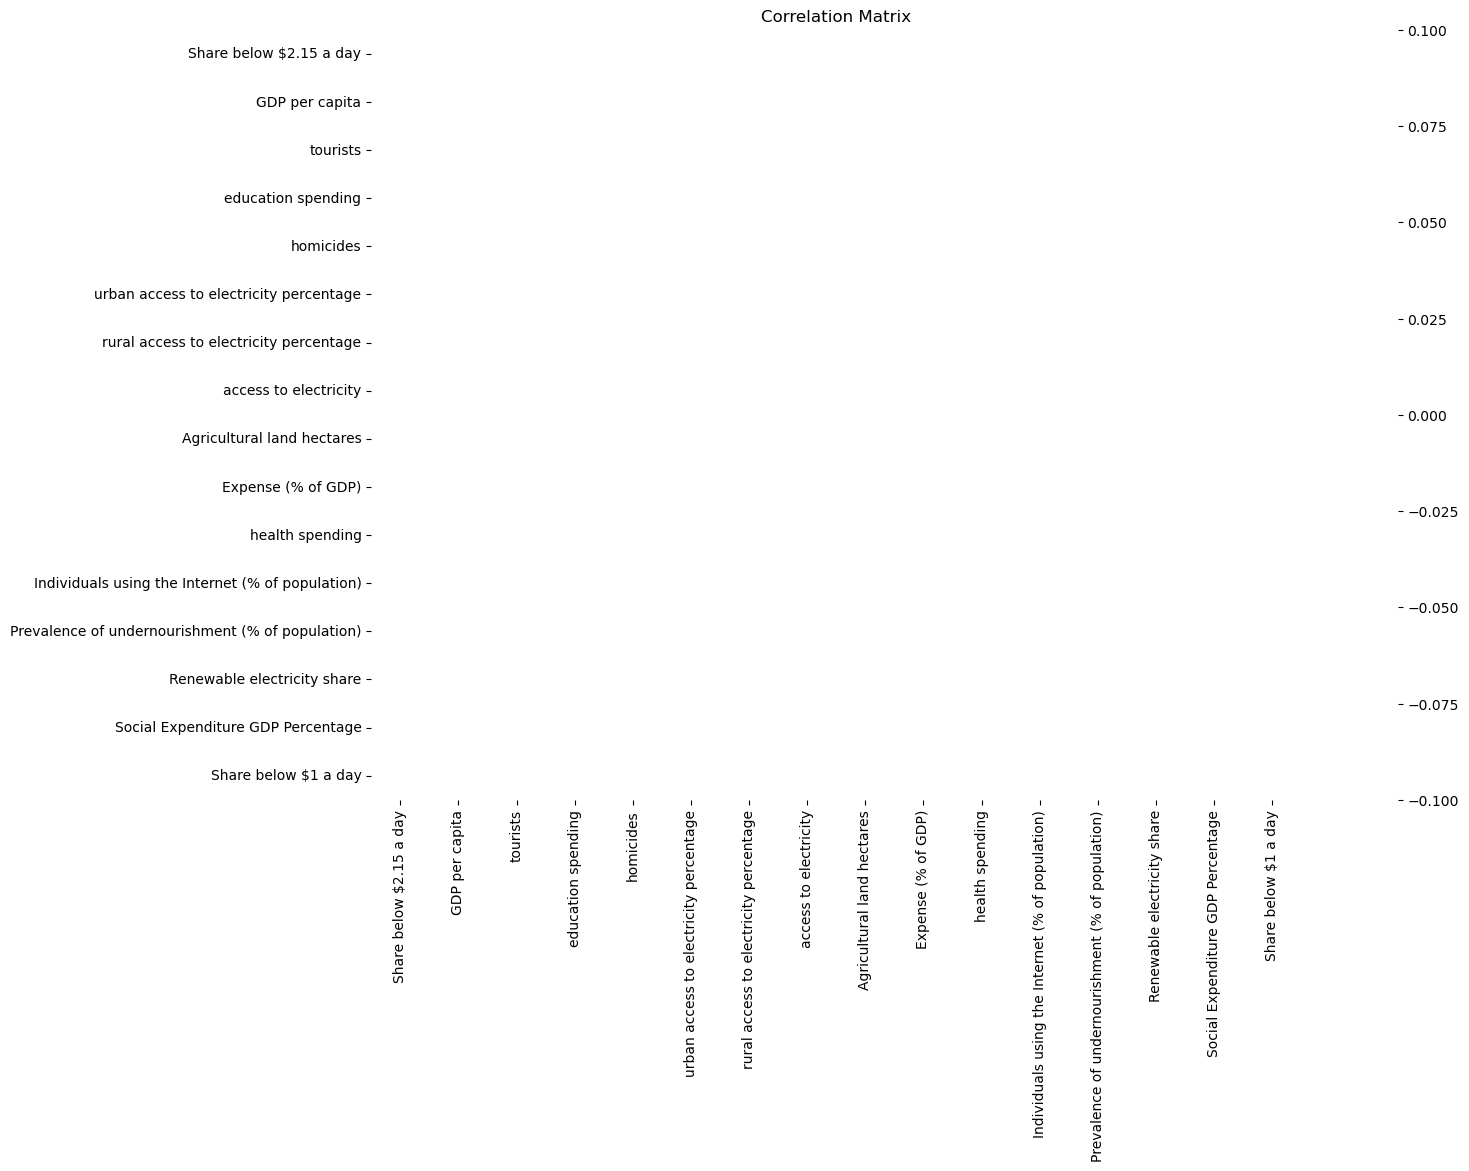

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # You can adjust the size of the figure as required
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [4]:
print(honduras_data.isnull().sum())

Entity                                                0
Year                                                  0
Share below $1 a day                                181
Share below $2.15 a day                             181
GDP per capita                                      141
tourists                                            184
education spending                                  199
homicides                                           182
urban access to electricity percentage              181
rural access to electricity percentage              181
access to electricity                               181
Agricultural land hectares                          151
Expense (% of GDP)                                  192
health spending                                     191
Individuals using the Internet (% of population)    180
Prevalence of undernourishment (% of population)    191
Renewable electricity share                         189
Social Expenditure GDP Percentage               

In [5]:
honduras_data.dropna(inplace=True)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

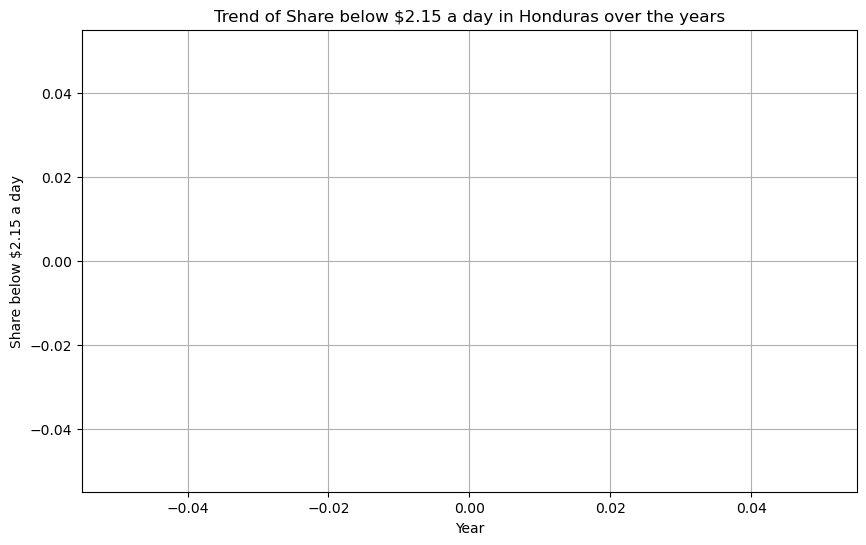

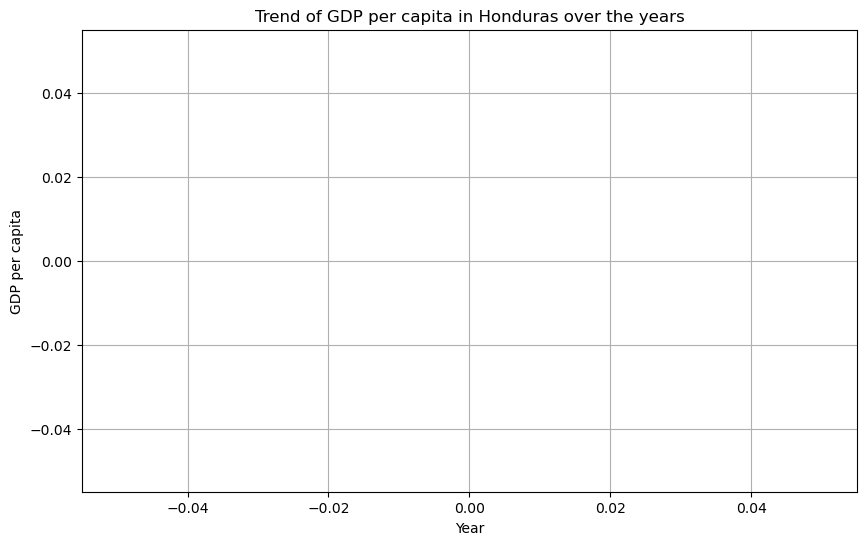

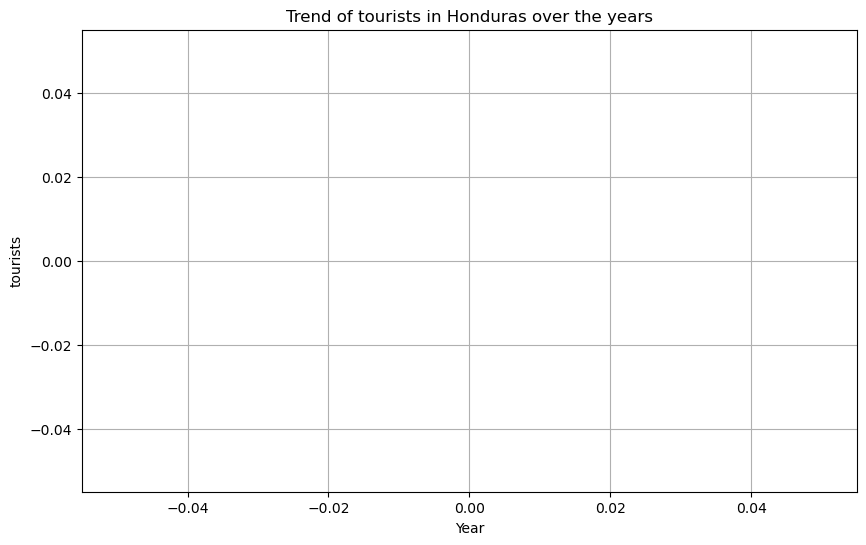

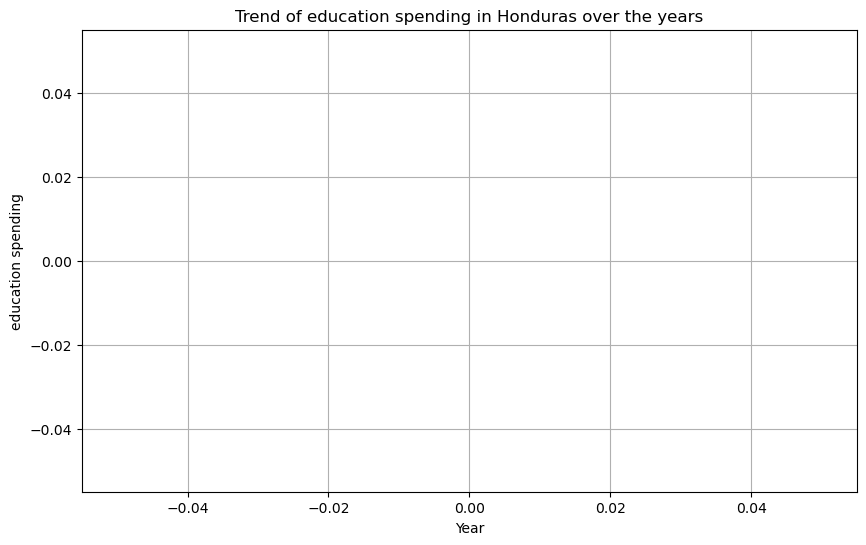

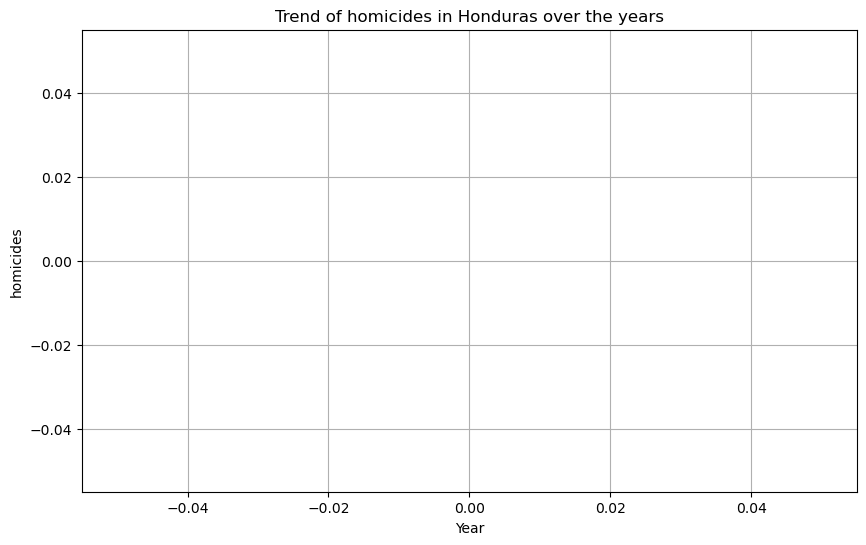

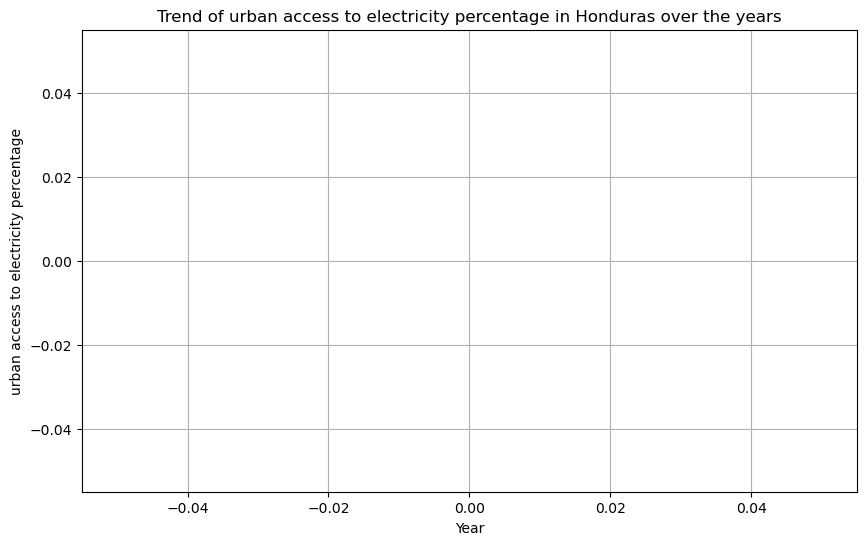

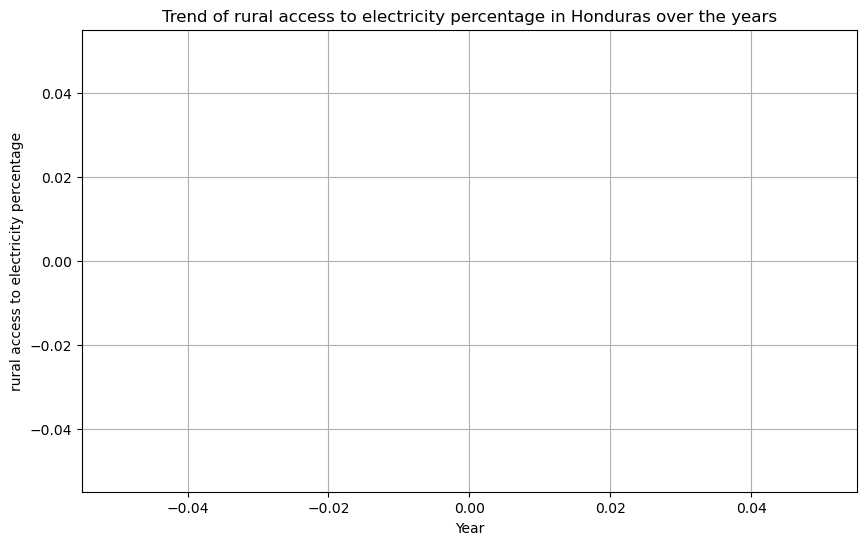

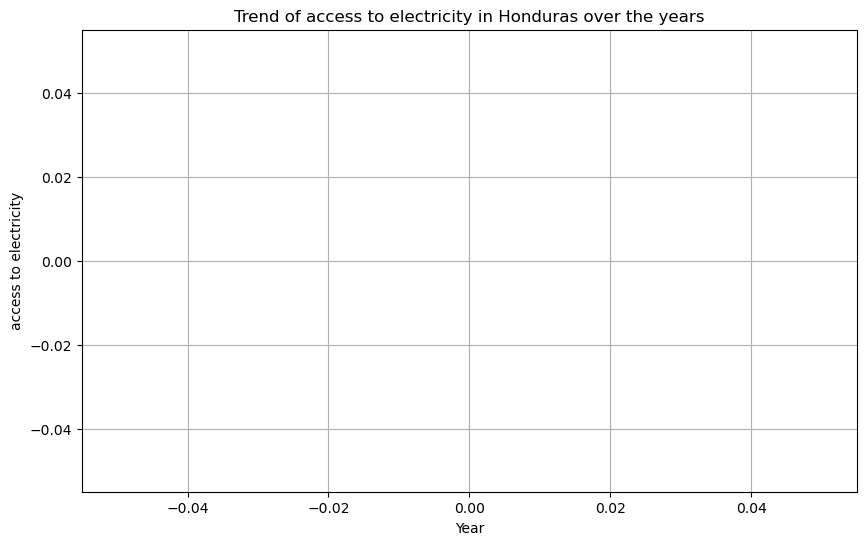

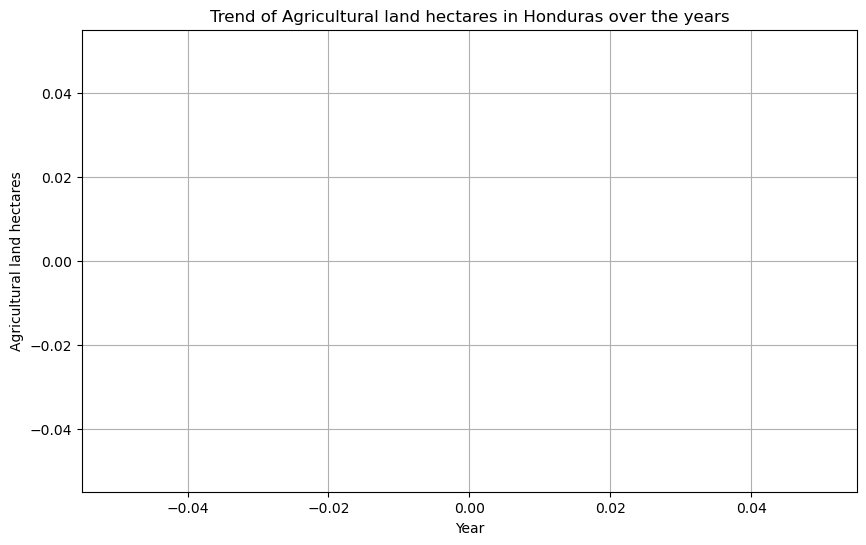

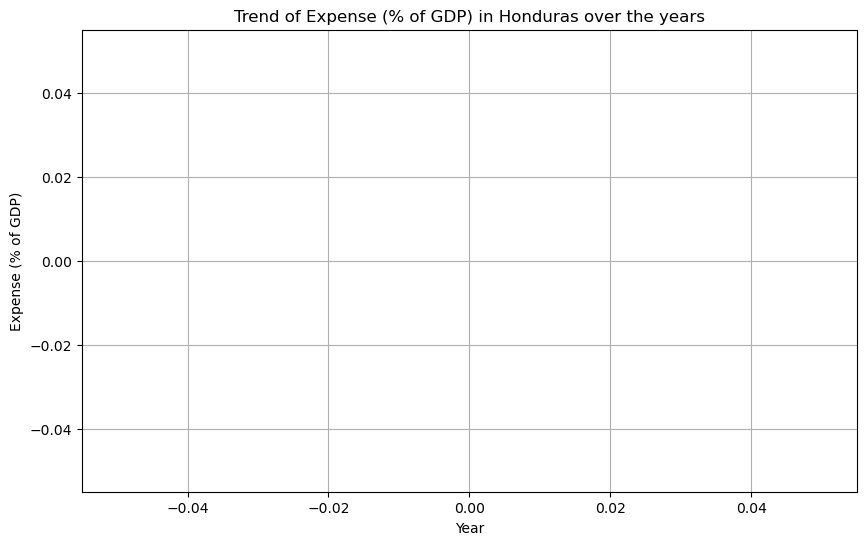

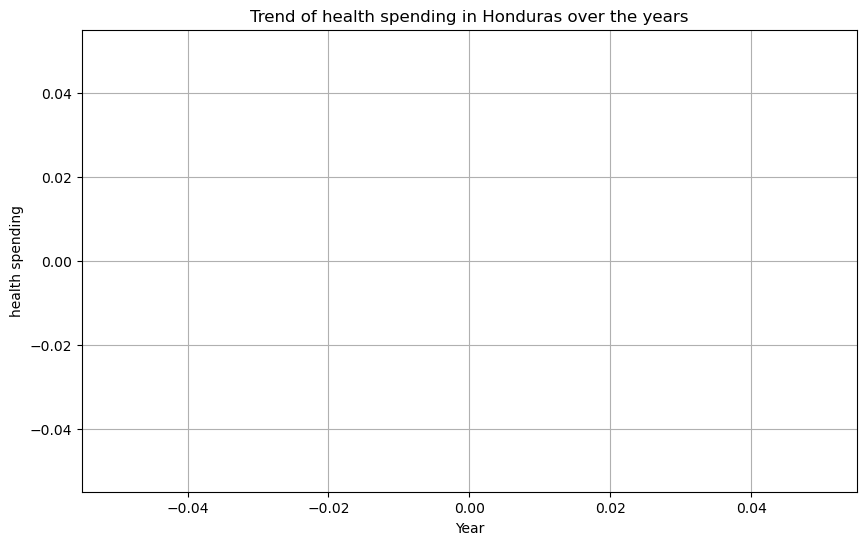

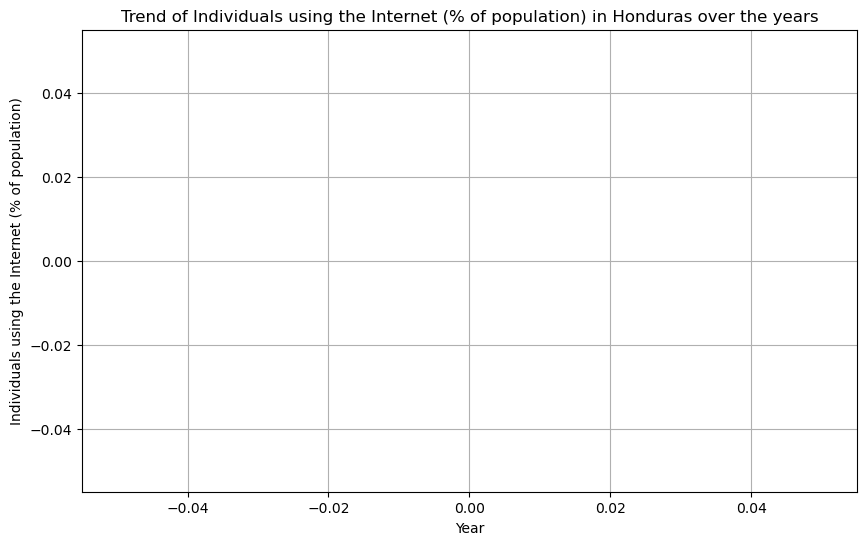

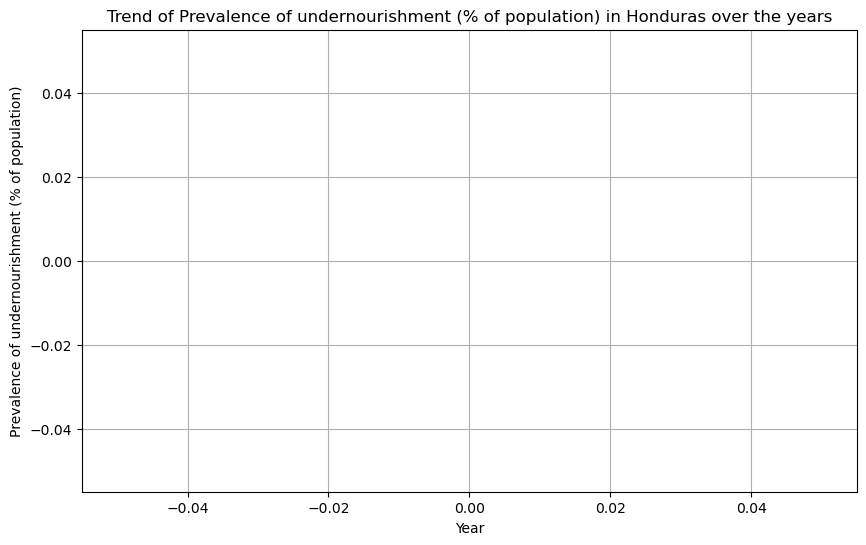

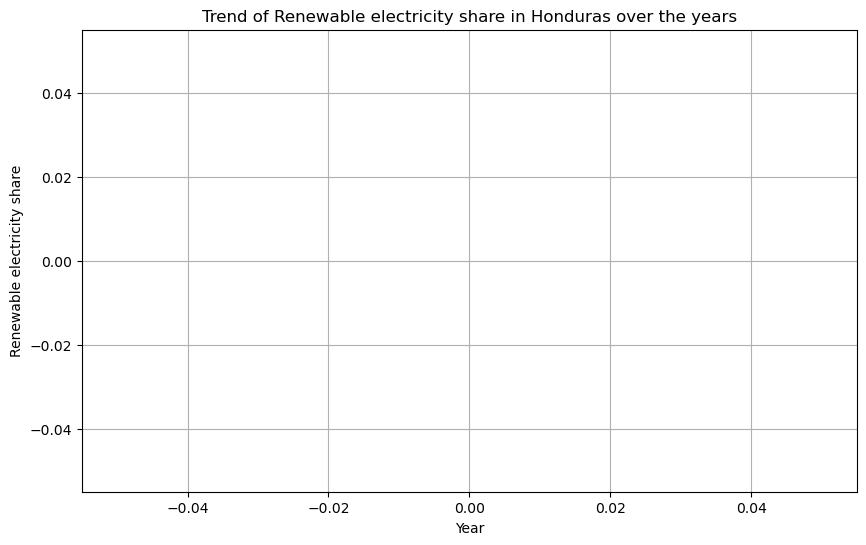

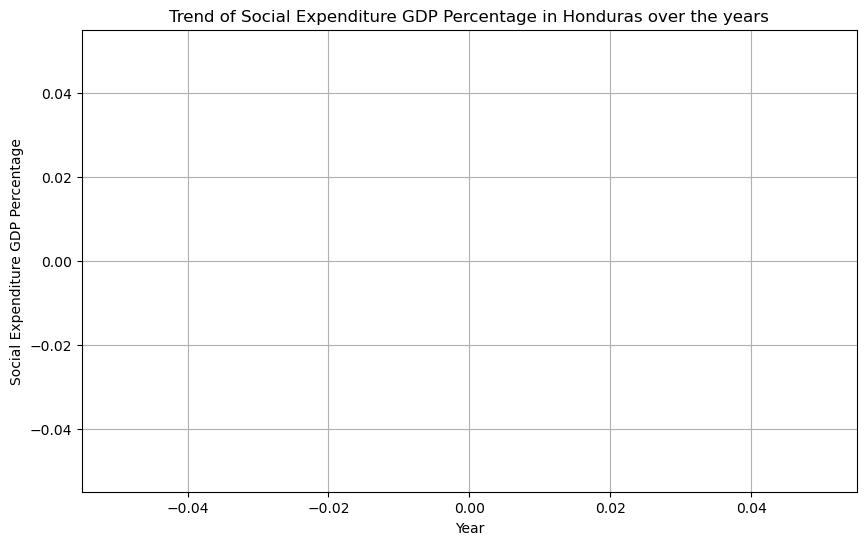

In [7]:
import matplotlib.pyplot as plt

# Visualizing the trends for each factor in Honduras
factors = list(X.columns)  # using the columns in X as the factors

for factor in factors:
    plt.figure(figsize=(10, 6))
    plt.plot(honduras_data['Year'], honduras_data[factor])
    plt.title(f'Trend of {factor} in Honduras over the years')
    plt.xlabel('Year')
    plt.ylabel(factor)
    plt.grid(True)
    plt.show()

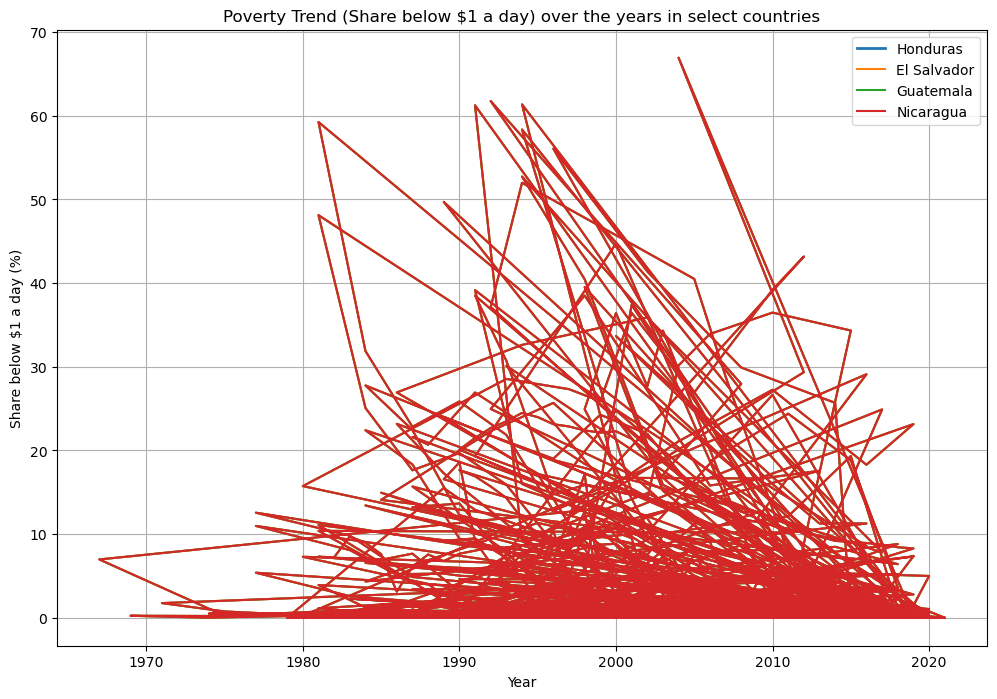

In [8]:
comparison_countries = ["El Salvador", "Guatemala", "Nicaragua"]

# Load data for the countries
dataframes = {country: pd.read_csv(datasets["poverty"]) for country in comparison_countries}
for country, df in dataframes.items():
    for key, csv_path in datasets.items():
        if key != "poverty":
            temp_data = pd.read_csv(csv_path)
            temp_data = temp_data[temp_data['Entity'] == country]
            df = df.merge(temp_data, on=['Year', 'Entity'], how='outer')
    dataframes[country] = df

# Visualizing the 'Share below $1 a day' trend for comparison countries
plt.figure(figsize=(12, 8))
plt.plot(honduras_data['Year'], honduras_data['Share below $1 a day'], label='Honduras', linewidth=2)
for country, df in dataframes.items():
    plt.plot(df['Year'], df['Share below $1 a day'], label=country)
plt.title('Poverty Trend (Share below $1 a day) over the years in select countries')
plt.xlabel('Year')
plt.ylabel('Share below $1 a day (%)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
correlations = honduras_data[factors + ['Share below $1 a day']].corr()
poverty_correlations = correlations['Share below $1 a day'].sort_values()

# Displaying the correlations
print(poverty_correlations)

Share below $2.15 a day                            NaN
GDP per capita                                     NaN
tourists                                           NaN
education spending                                 NaN
homicides                                          NaN
urban access to electricity percentage             NaN
rural access to electricity percentage             NaN
access to electricity                              NaN
Agricultural land hectares                         NaN
Expense (% of GDP)                                 NaN
health spending                                    NaN
Individuals using the Internet (% of population)   NaN
Prevalence of undernourishment (% of population)   NaN
Renewable electricity share                        NaN
Social Expenditure GDP Percentage                  NaN
Share below $1 a day                               NaN
Name: Share below $1 a day, dtype: float64
